#Gold price in Time Series Analysis

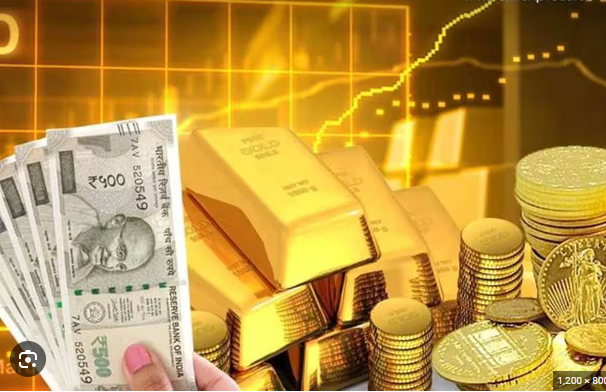

In [ ]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Reading the csv file and storing it in a dataframe
df = pd.read_csv('/content/Gold Price.csv')
df

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55
...,...,...,...,...,...,...,...
2222,2022-08-01,51260,51899,51899,51023,1350,-0.20
2223,2022-08-02,51274,51438,51527,51100,230,0.03
2224,2022-08-03,51225,51250,51375,51137,70,-0.10
2225,2022-08-04,51802,51713,51903,51713,10,1.13


1.Date: The date of the recorded financial data.
2.High: The highest price of the financial asset (e.g., stock) during the given date.
3.Low: The lowest price of the financial asset during the given date.
4.Open: The opening price of the financial asset at the beginning of the given date.
5.Volume: The trading volume or the number of shares/contracts traded during the given date.
6.Price: The price of the financial asset at the end of the givenZ7.
7.date. Adjusted closing prices take into account factors such as dividends and stock splits


In [ ]:
#Calling the first five rows using head.
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [ ]:
#Printing all the column names using columns
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [ ]:
#Checking whether if there are any null items in the datset
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [ ]:
df["Date"].min(), df["Date"].max()

('2014-01-01', '2022-08-05')

In [ ]:
#Finding the unique number of each column
a = df['Date'].nunique()
print(a, "are the number of unique dates")
b = df['Price'].nunique()
print(b, "are the number of unique Price")
c = df['Open'].nunique()
print(c,"are the number of unique Open")
d = df['High'].nunique()
print(d, "are the number of unique High")
e = df['Low'].nunique()
print(e, "are the number of unique Low")
f = df['Volume'].nunique()
print(f, "are the number of unique Volume")
g = df['Chg%'].nunique()
print(g, "are the number of unique Chg%")

2227 are the number of unique dates
2056 are the number of unique Price
1902 are the number of unique Open
1990 are the number of unique High
1958 are the number of unique Low
1455 are the number of unique Volume
407 are the number of unique Chg%


In [ ]:
df['High'].unique()

array([29598, 30050, 30125, ..., 51375, 51903, 51965])

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2227 non-null   object 
 1   Price   2227 non-null   int64  
 2   Open    2227 non-null   int64  
 3   High    2227 non-null   int64  
 4   Low     2227 non-null   int64  
 5   Volume  2227 non-null   int64  
 6   Chg%    2227 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 121.9+ KB


In [ ]:
#describe
df.describe()

,Price,Open,High,Low,Volume,Chg%
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000
mean,35217.900763,35222.369106,35417.074540,35019.329591,13508.495734,0.029070
std,8964.037211,8971.608761,9032.667462,8893.063733,11314.007396,0.857102
min,24545.000000,24583.000000,24635.000000,24470.000000,0.000000,-5.980000
25%,28554.500000,28531.000000,28659.000000,28417.500000,6680.000000,-0.400000
50%,30766.000000,30738.000000,30906.000000,30610.000000,11490.000000,0.020000
75%,45942.500000,45876.500000,46242.500000,45522.500000,17910.000000,0.460000
max,56117.000000,56351.000000,56499.000000,55400.000000,106920.000000,5.300000


In [ ]:
#1. **Price Trend Analysis**: Analyze trends in commodity prices over time to identify patterns and fluctuations.
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Sort data by date
df.sort_values('Date', inplace=True)

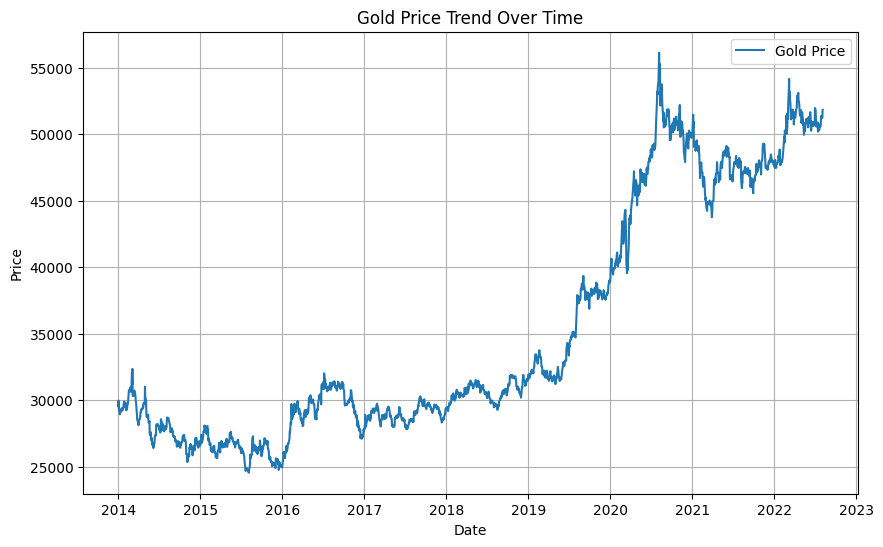

In [ ]:
# Plot the price trend over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Gold Price')
plt.title('Gold Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate percentage change in prices
df['PriceChange'] = df['Price'].pct_change()

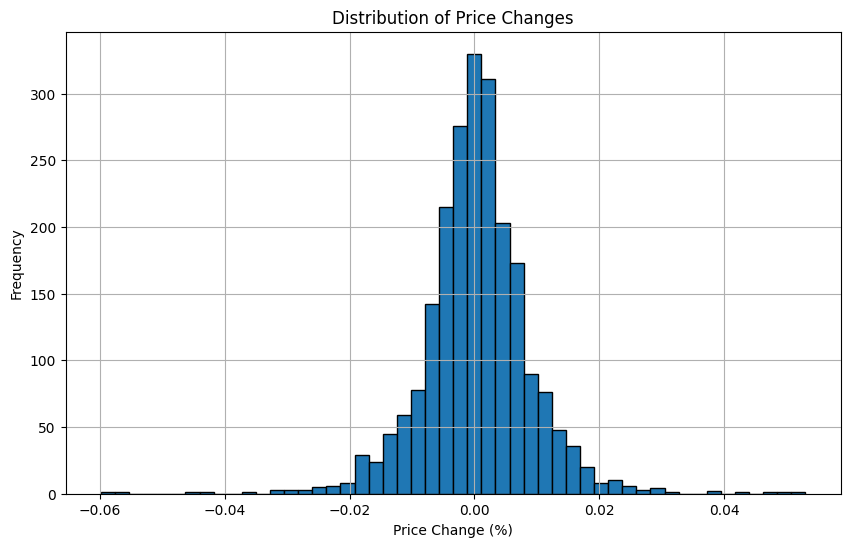

In [ ]:
# Plot the distribution of price changes
plt.figure(figsize=(10, 6))
plt.hist(df['PriceChange'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Price Changes')
plt.xlabel('Price Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


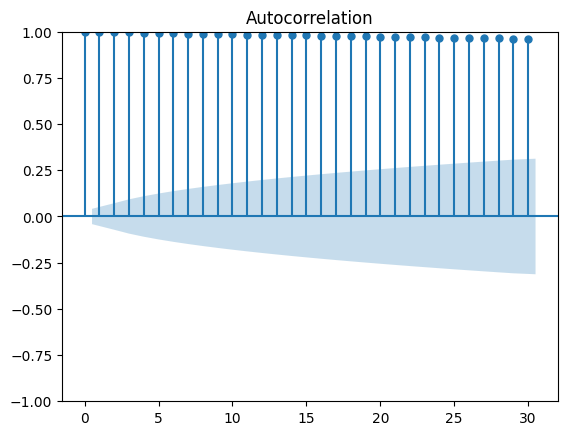

In [ ]:
# Autocorrelation Analysis
sm.graphics.tsa.plot_acf(df['Price'], lags=30)
plt.show()

In [ ]:
#2.**Minimum and Maximum Price Identification**: Identify dates when commodities reached their minimum and maximum prices.
# Find the minimum and maximum prices along with their corresponding dates
min_price_date = df.loc[df['Price'].idxmin()]['Date']
max_price_date = df.loc[df['Price'].idxmax()]['Date']

In [ ]:
# Print the results
print(f"Minimum price was reached on: {min_price_date}")
print(f"Maximum price was reached on: {max_price_date}")

Minimum price was reached on: 2015-08-05 00:00:00
Maximum price was reached on: 2020-08-06 00:00:00


In the above shows minimum and maximum prices reached in which date, year and month

In [ ]:
# 3. **Price Averages**: Study the average price of commodities over different time periods.
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Set 'Date' column as the index
df.set_index('Date', inplace=True)

In [ ]:
# You can change 'D' to 'M' for monthly, 'Q' for quarterly, 'Y' for yearly, etc.
resampled_df = df.resample('M').mean()

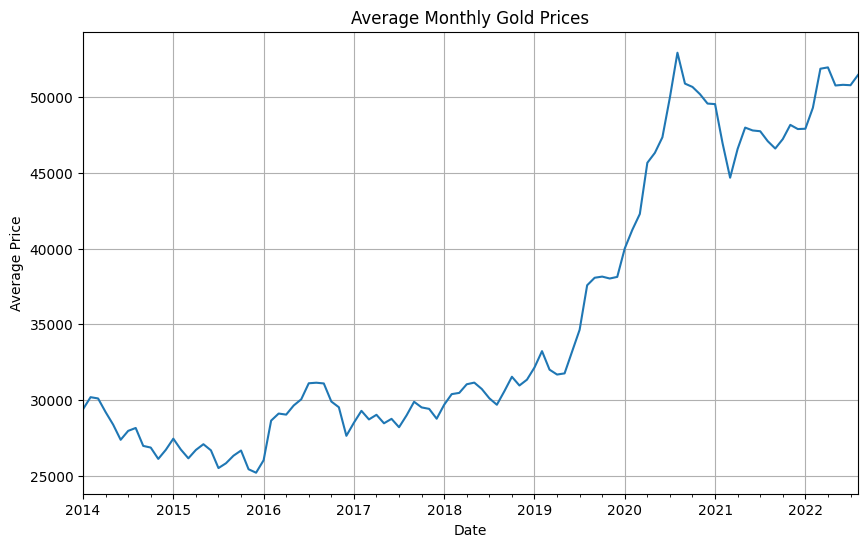

In [ ]:
# Plot the average prices
resampled_df['Price'].plot(figsize=(10, 6))
plt.title('Average Monthly Gold Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

The Average True Range (ATR) calculated in the provided code is a technical indicator used to measure the volatility of a financial asset over a specific period. It provides insights into the average price movement (volatility) of the asset, allowing traders and analysts to assess the potential risk associated with trading or holding that asset.


A higher value on the chart indicates higher volatility, whereas a lower value indicates lower volatility. The line chart helps to visualize the volatility patterns over time and understand how the price fluctuates on a daily basis.

Volatility assessment is essential for risk management and trading strategies, as higher volatility implies higher potential risks and rewards.



In [ ]:
# 4.**Market Volatility**: Analyze the variability of commodity prices to understand market volatility.
# Calculate daily price changes
df['PriceChange'] = df['Price'].diff()


In [ ]:
# Calculate rolling standard deviation to measure volatility
window_size = 30
df['Volatility'] = df['PriceChange'].rolling(window=window_size).std()

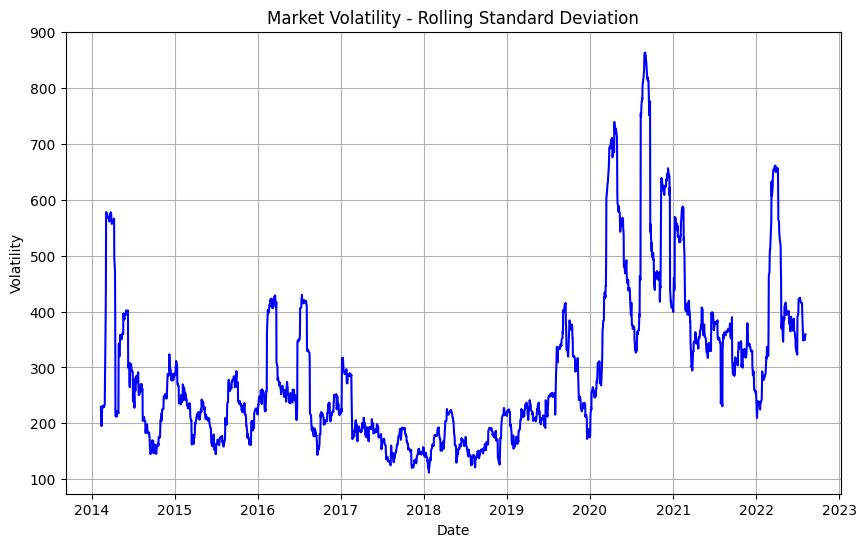

In [ ]:
# Plot the volatility
plt.figure(figsize=(10, 6))
plt.plot(df['Volatility'], color='blue')
plt.title('Market Volatility - Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

In [ ]:
6.#**Seasonal Analysis**: Analyze whether commodities exhibit seasonal patterns in their prices.
# Load data from CSV file
df = pd.read_csv('/content/Gold Price.csv', index_col='Date')  # Set 'Date' column as index


In [ ]:
# Convert index to datetime format
df.index = pd.to_datetime(df.index)


In [ ]:
# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year

In [ ]:
# Calculate average prices for each month across all years
average_prices_by_month = df.groupby('Month')['Price'].mean()


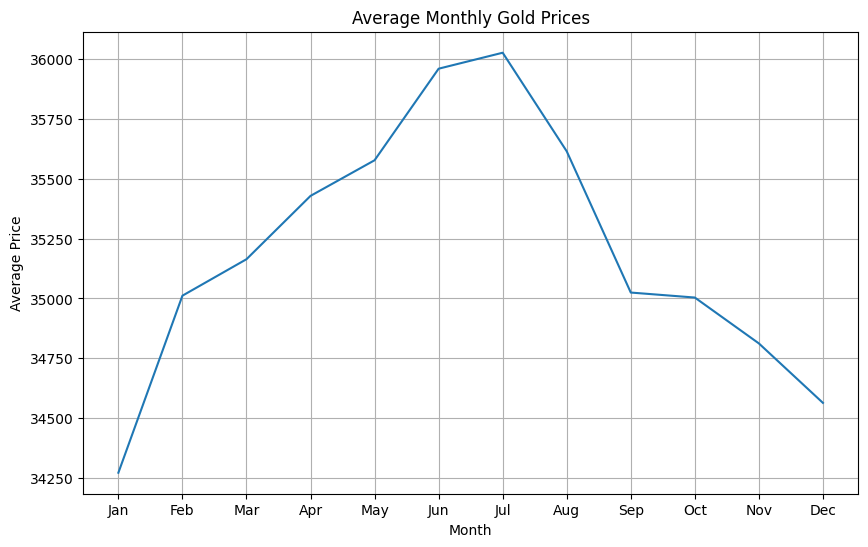

In [ ]:
# Plot the average prices by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_prices_by_month)
plt.title('Average Monthly Gold Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [ ]:
# Calculate average prices for each month across all years
average_prices_by_Year = df.groupby('Year')['Price'].mean()


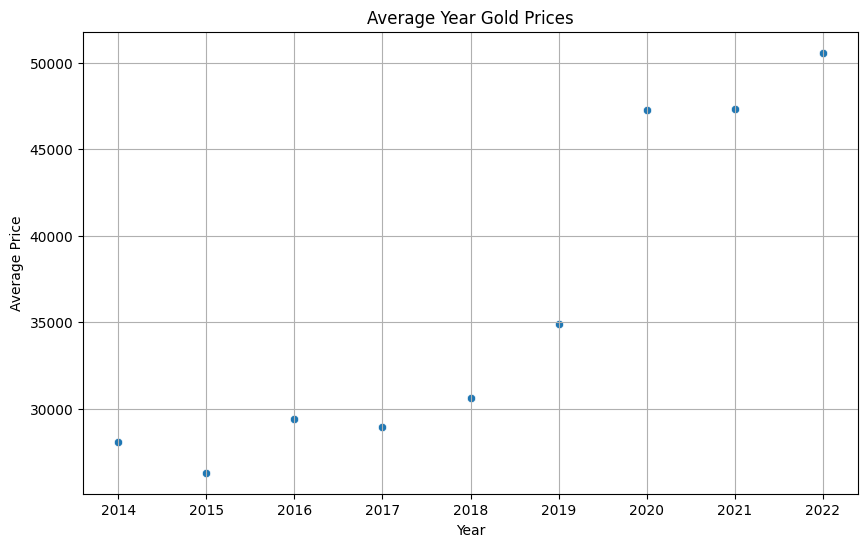

In [ ]:
# Plot the average prices by Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=average_prices_by_Year)
plt.title('Average Year Gold Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

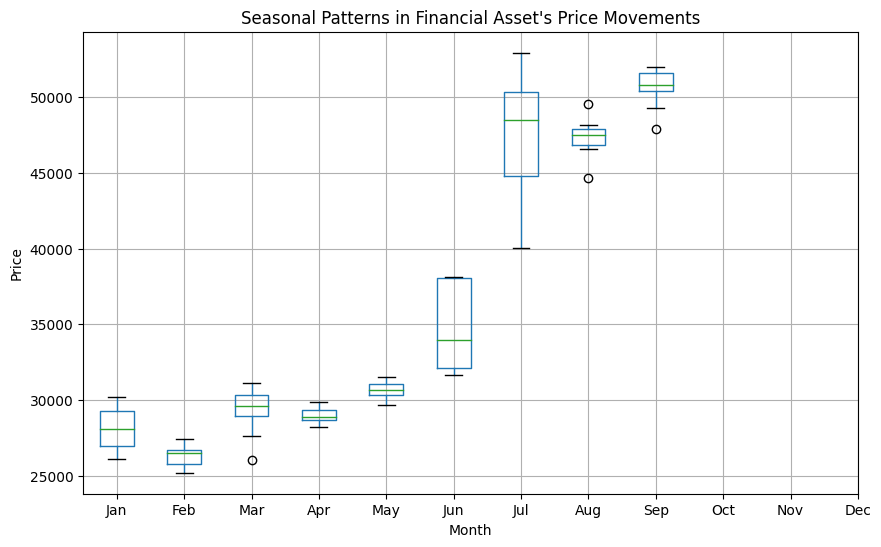

In [ ]:

# Extract the month from the 'Date' column
df['Month'] = df.index.month

# Group the data by month and year, and calculate the mean price for each group
monthly_prices = df.groupby(['Month', df.index.year])['Price'].mean().unstack()

# Create a box plot to visualize the distribution of prices for each month
plt.figure(figsize=(10, 6))
monthly_prices.boxplot()
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Seasonal Patterns in Financial Asset\'s Price Movements')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


we analyze the data with seasonal patterns in their prices

In [ ]:
# Load data from CSV file
df = pd.read_csv('/content/Gold Price.csv')


In [ ]:
# 7 **Forecasting**: Build forecasting models to predict future commodity prices based on historical data.
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# Assuming the 'Date' column is already set as the index
# Let's use the 'Chg%' column for forecasting
ts_data = df['Price']
# Split the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]
order = (5, 1, 0)  # Example order for ARIMA model (p, d, q)
model = ARIMA(train_data, order=order)#This creates an ARIMA model with the specified order and fits it to the training data.
model_fit = model.fit()

In [ ]:
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2588.482472283996


In [ ]:

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:

mape = mean_absolute_percentage_error(test_data, forecast)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 5.470142063144627


In [ ]:
# Calculate Percentage Error
percentage_error = (forecast - test_data) / test_data * 100
print("Percentage Error:")
print(percentage_error)

Percentage Error:
1781    0.165773
1782    0.322791
1783    0.453940
1784    1.244688
1785    1.848421
          ...   
2222   -0.534095
2223   -0.561254
2224   -0.466134
2225   -1.574799
2226   -1.608987
Length: 446, dtype: float64


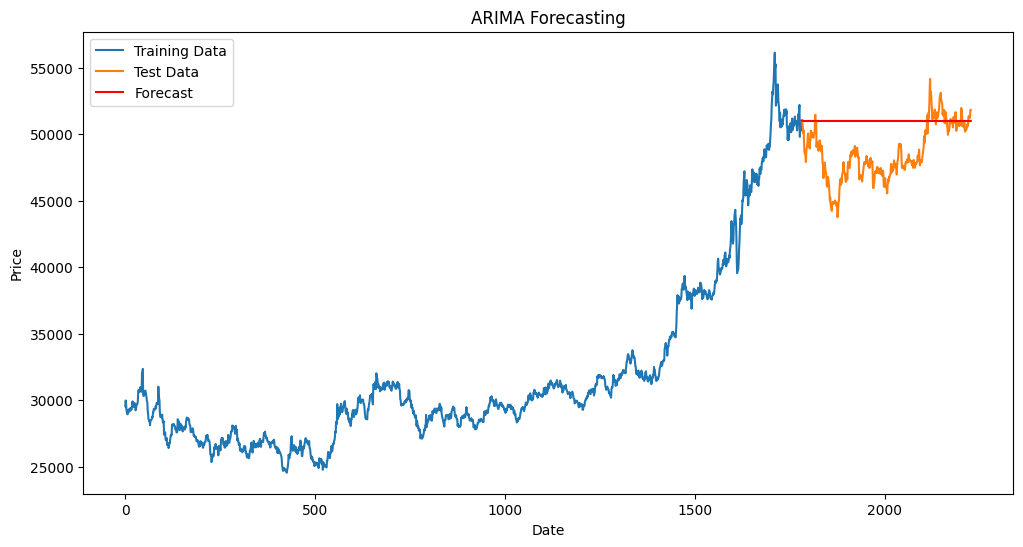

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# Correlation Analysis: Explore correlations between this financial asset and other related assets or market indices.

<ipython-input-43-95dc88b4d063>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


           Price      Open      High       Low    Volume      Chg%
Price   1.000000  0.999423  0.999681  0.999741  0.272479  0.032363
Open    0.999423  1.000000  0.999693  0.999631  0.272942  0.003337
High    0.999681  0.999693  1.000000  0.999481  0.278379  0.019092
Low     0.999741  0.999631  0.999481  1.000000  0.266097  0.019264
Volume  0.272479  0.272942  0.278379  0.266097  1.000000 -0.039056
Chg%    0.032363  0.003337  0.019092  0.019264 -0.039056  1.000000


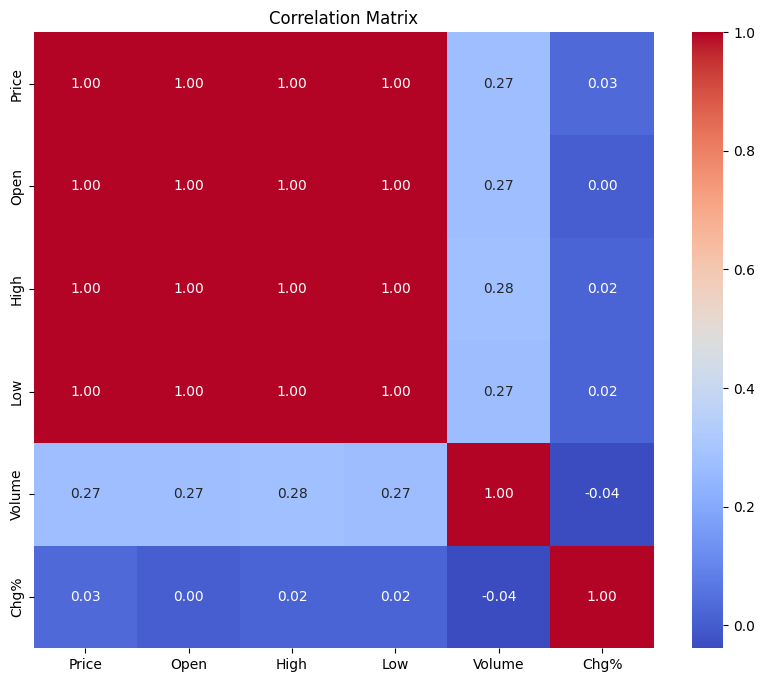

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot: adds numeric annotations
#".2f" means floating-point numbers with two decimal places.
plt.title("Correlation Matrix")
plt.show()
#each cell's color represents the strength and direction of the correlation between two variables.
#The annotations inside the cells will display the correlation coefficients with two decimal places.

This code calculates the correlation matrix for the financial asset in the 'yahoo_stock' dataset and displays it as a heatmap using Python's Matplotlib and Seaborn libraries.

The heatmap provides a visual representation of the correlation matrix, making it easier to identify the strength and direction of the relationships between different variables (e.g., the financial asset and other related assets or indices). The color intensity of each cell represents the strength of the correlation, and the annotations inside the cells show the correlation coefficients. The heatmap is a valuable tool for analyzing the interrelationships between various financial assets and can be helpful in forming investment strategies, identifying diversification opportunities, and managing portfolio risk.

#9. Trading Volume Analysis: Analyze trading volume patterns to understand market interest and liquidity.

In [ ]:
# Calculate basic statistics of trading volume
volume_stats = df['Volume'].describe()
print(volume_stats)

count      2227.000000
mean      13508.495734
std       11314.007396
min           0.000000
25%        6680.000000
50%       11490.000000
75%       17910.000000
max      106920.000000
Name: Volume, dtype: float64


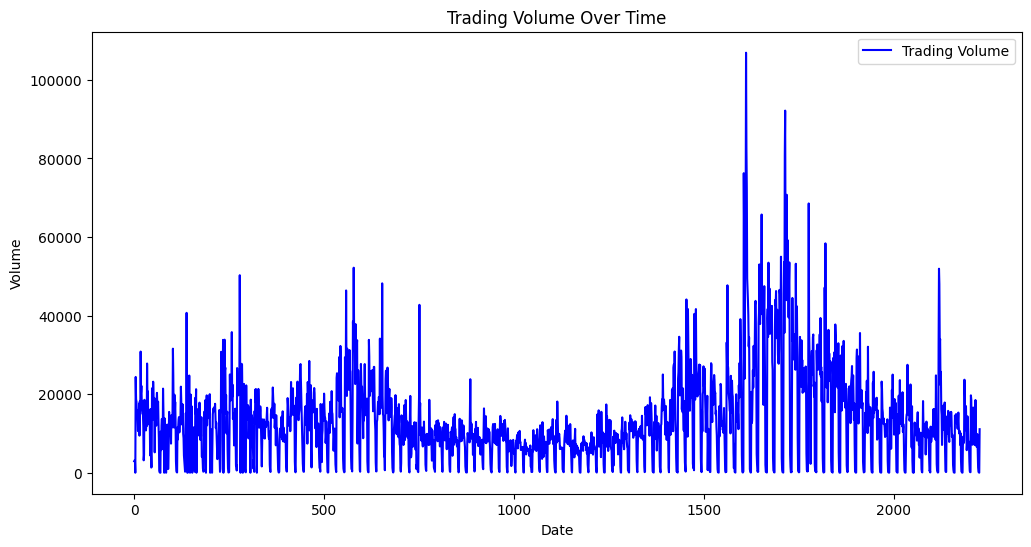

In [ ]:
# Plot trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Trading Volume', color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

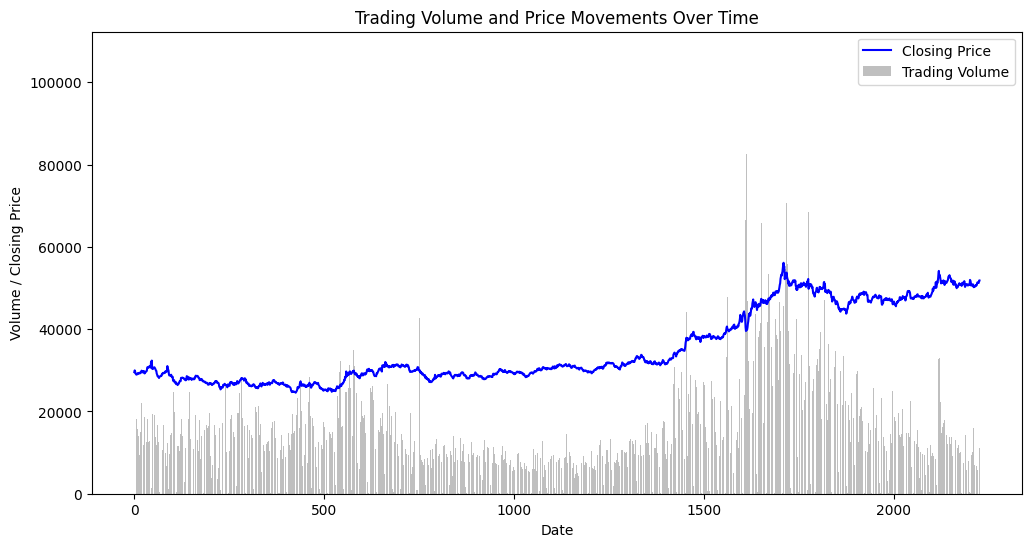

In [ ]:
# Plot trading volume and price movements over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Closing Price', color='blue')
plt.bar(df.index, df['Volume'], label='Trading Volume', color='gray', alpha=0.5)
plt.title('Trading Volume and Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Volume / Closing Price')
plt.legend()
plt.show()

In [ ]:
# Calculate rolling average of trading volume
rolling_volume = df['Volume'].rolling(window=30).mean()

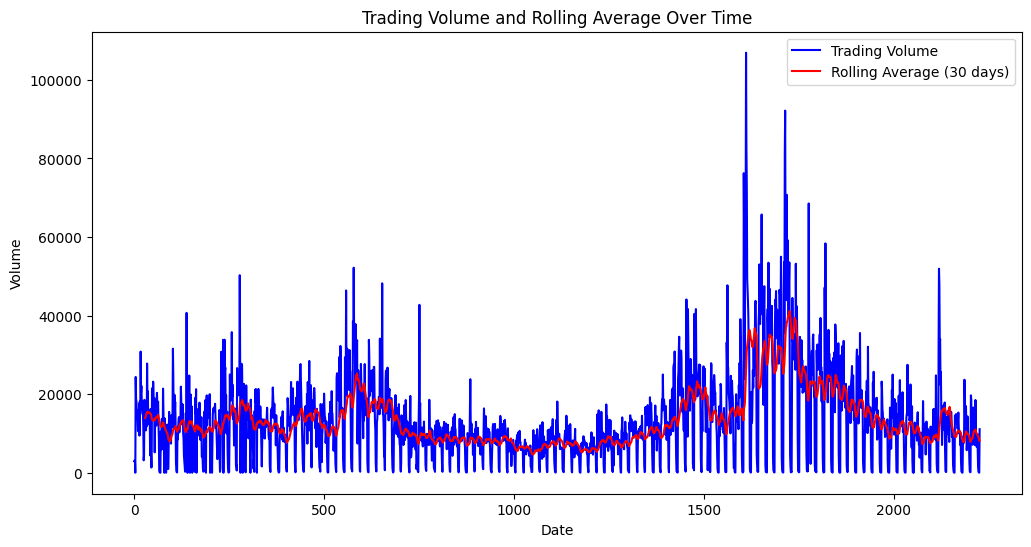

In [ ]:
# Plot trading volume and its rolling average over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Trading Volume', color='blue')
plt.plot(df.index, rolling_volume, label='Rolling Average (30 days)', color='red')
plt.title('Trading Volume and Rolling Average Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

This code performs various analyses and visualizations related to the trading volume of a financial asset. The DataFrame contains the financial data with the 'Volume' column representing the trading volume for each day.

# Trend Identification: Determine the overall trend of the financial asset over time (e.g., uptrend, downtrend, sideways).


In [ ]:
# Calculate 50-day and 200-day moving averages
df['MA_50'] = df['Price'].rolling(window=50).mean()
df['MA_200'] = df['Price'].rolling(window=200).mean()

In [ ]:
# Determine the trend based on moving averages
df['Trend'] = 'Sideways' #This is the default value, assuming there is no significant trend at the beginning.
df.loc[df['MA_50'] > df['MA_200'], 'Trend'] = 'Uptrend'
#the code uses the loc function to update the 'Trend' column for specific rows where the condition is met.
#if the 50-day moving average (MA_50) is greater than the 200-day moving average (MA_200), it assigns the value 'Uptrend'
df.loc[df['MA_50'] < df['MA_200'], 'Trend'] = 'Downtrend'
#Similarly, if MA_50 is less than MA_200, it assigns the value 'Downtrend' to the 'Trend'

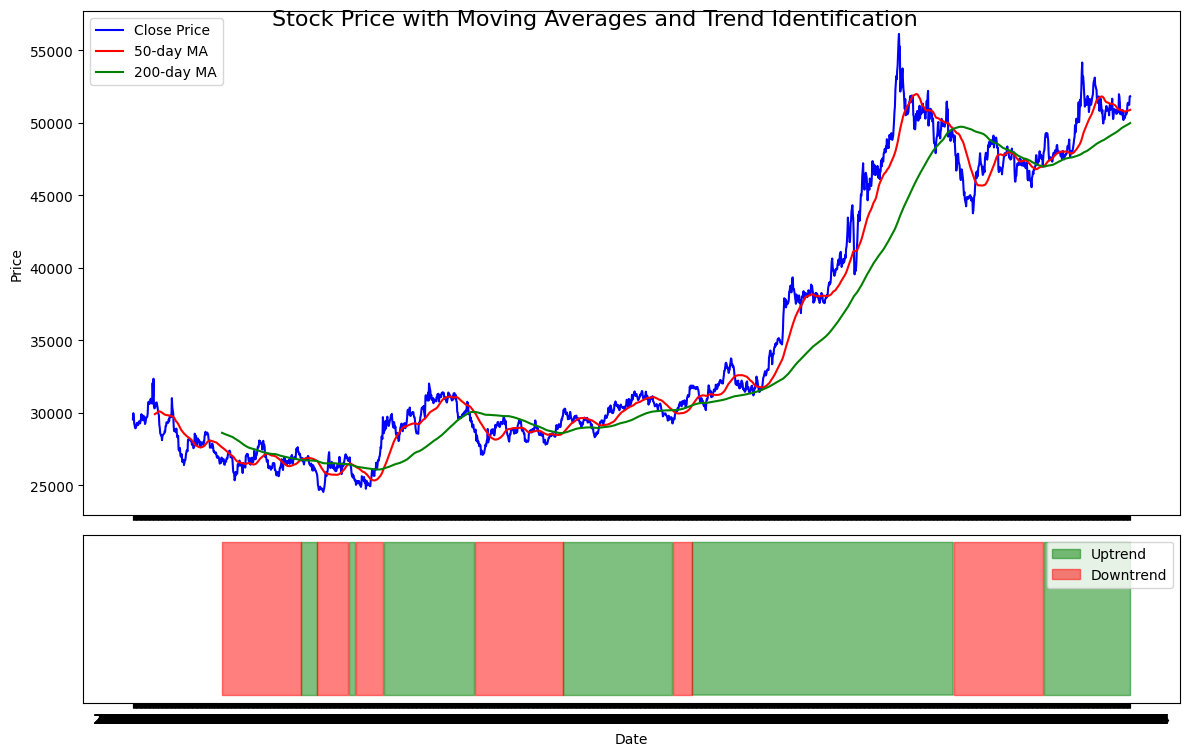

Uptrend      1275
Downtrend     753
Sideways      199
Name: Trend, dtype: int64


In [ ]:
# Create the dual-panel chart
#A dual-panel chart usually refers to a chart layout that presents 2 different chart types or 2 different time frames of the same asset or financial instrument side by side.
#This arrangement allows traders to compare and analyze different aspects of the asset's price action simultaneously.
fig, ax = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# First Panel: Stock Price with Moving Averages
ax[0].plot(df['Date'], df['Price'], label='Close Price', color='blue')
ax[0].plot(df['Date'], df['MA_50'], label='50-day MA', color='red')
ax[0].plot(df['Date'], df['MA_200'], label='200-day MA', color='green')
ax[0].set_ylabel('Price')
ax[0].legend()

# Second Panel: Trend Identification as Area Chart
ax[1].fill_between(df['Date'], 0, 1, where=(df['Trend'] == 'Uptrend'), color='green', alpha=0.5, label='Uptrend')
ax[1].fill_between(df['Date'], 0, 1, where=(df['Trend'] == 'Downtrend'), color='red', alpha=0.5, label='Downtrend')
ax[1].set_yticks([])
ax[1].legend()

# Finalize the plot
plt.xlabel('Date')
plt.suptitle('Stock Price with Moving Averages and Trend Identification', y=0.94, fontsize=16)
plt.tight_layout()
plt.show()

print(df['Trend'].value_counts())


To determine the overall trend of the financial asset over time, we can use the moving averages as an indicator. When the shorter-term moving average (e.g., 50-day MA) is above the longer-term moving average (e.g., 200-day MA), it indicates an uptrend. Conversely, when the shorter-term moving average is below the longer-term moving average, it indicates a downtrend. If the moving averages are relatively close and cross each other frequently, it may suggest a sideways or ranging market. In this modified code, we added the 'Trend' column to the DataFrame, where we set the trend based on the relationship between the 50-day and 200-day moving averages. The 'Trend' column will indicate whether the financial asset is in an uptrend, downtrend, or sideways market.

We then use a separate subplot to visualize the overall trend. The green area represents an uptrend, the red area represents a downtrend, and the white area represents a sideways or ranging market.

This will help us to get a visual sense of the overall trend of the financial asset over time, based on the moving averages.

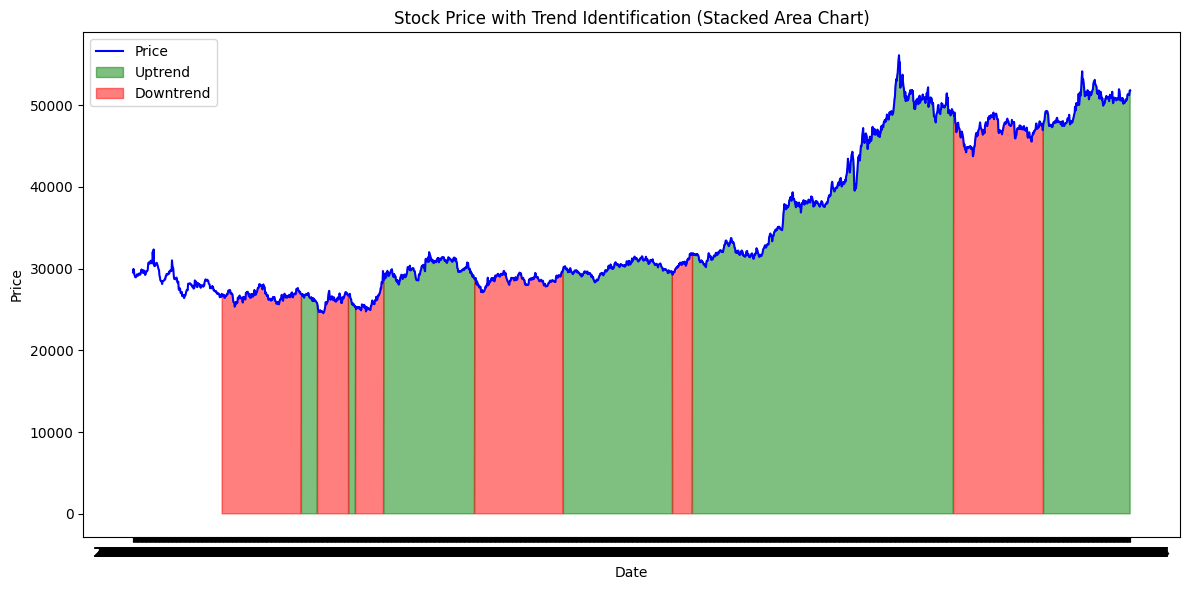

Uptrend      1275
Downtrend     753
Sideways      199
Name: Trend, dtype: int64


In [ ]:
# Determine the trend based on moving averages
df['Trend'] = 'Sideways'
df.loc[df['MA_50'] > df['MA_200'], 'Trend'] = 'Uptrend'
df.loc[df['MA_50'] < df['MA_200'], 'Trend'] = 'Downtrend'

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(12, 6))

# Price Line Plot
ax.plot(df['Date'], df['Price'], label='Price', color='blue')

# Trend Stacked Area Chart
ax.fill_between(df['Date'], df['Price'], where=(df['Trend'] == 'Uptrend'), interpolate=True, color='green', alpha=0.5, label='Uptrend')
ax.fill_between(df['Date'], df['Price'], where=(df['Trend'] == 'Downtrend'), interpolate=True, color='red', alpha=0.5, label='Downtrend')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Price with Trend Identification (Stacked Area Chart)')
ax.legend()
plt.tight_layout()
plt.show()

print(df['Trend'].value_counts())


In this code, we first read the data from the yahoo_stock.csv file, calculate the 50-day and 200-day moving averages, and then determine the overall trend based on the relationship between these moving averages. The Trend column will indicate whether the asset is in an uptrend, downtrend, or sideways market.

We then plot the stock price chart along with the moving averages and highlight the uptrend, downtrend, and sideways periods using different colors. The green color represents the uptrend, the red color represents the downtrend, and the periods in between are sideways.

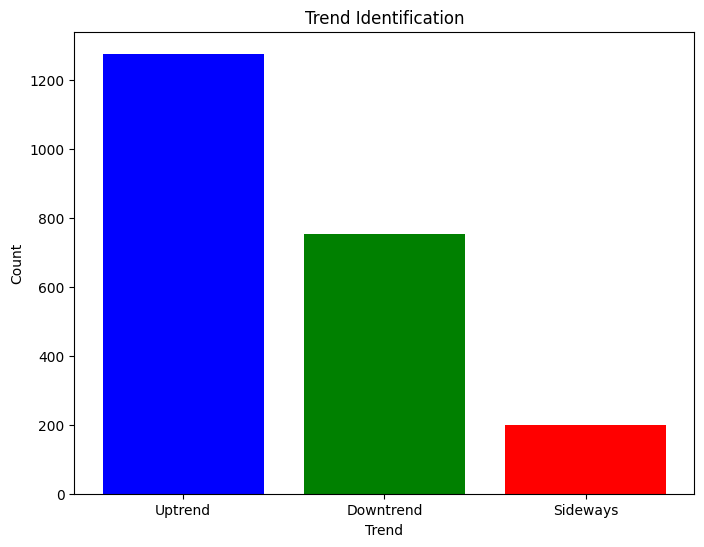

Uptrend      1275
Downtrend     753
Sideways      199
Name: Trend, dtype: int64


In [ ]:
# Determine the trend based on moving averages
df['Trend'] = 'Sideways'
df.loc[df['MA_50'] > df['MA_200'], 'Trend'] = 'Uptrend'
df.loc[df['MA_50'] < df['MA_200'], 'Trend'] = 'Downtrend'

# Count the occurrences of each trend category
trend_counts = df['Trend'].value_counts()

# Plot the bar plot for trend identification
plt.figure(figsize=(8, 6))
plt.bar(trend_counts.index, trend_counts.values, color=['blue', 'green', 'red'])
plt.xlabel('Trend')
plt.ylabel('Count')
plt.title('Trend Identification')
plt.show()

print(trend_counts)


 # Market Efficiency: Test the efficiency of the market for this financial asset (e.g., random walk hypothesis).

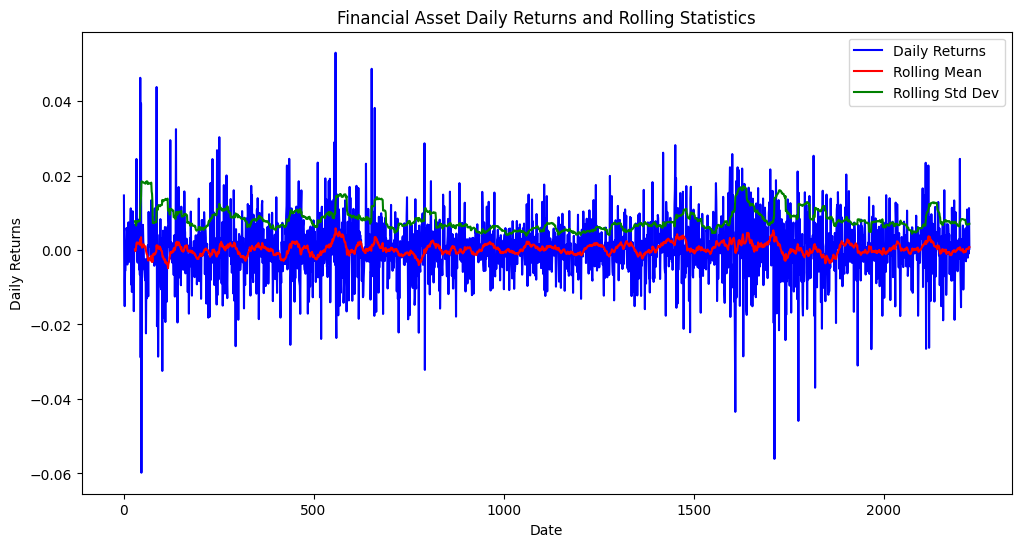

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with financial asset data, and 'Price' column contains the closing prices

# Calculate daily returns for the financial asset
df['Daily_Return'] = df['Price'].pct_change()

# Perform the rolling window analysis
window_size = 30  # Number of days in each rolling window
rolling_mean = df['Daily_Return'].rolling(window=window_size).mean()
rolling_std = df['Daily_Return'].rolling(window=window_size).std()

# Plot the rolling mean and standard deviation of returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily_Return'], label='Daily Returns', color='blue')
plt.plot(df.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(df.index, rolling_std, label='Rolling Std Dev', color='green')
plt.title('Financial Asset Daily Returns and Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'df' is the DataFrame with financial asset data, and 'Close' column contains the closing prices

# Perform the ADF test
result = adfuller(df['Price'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Define a significance level (e.g., 0.05)
significance_level = 0.05

# Interpret the ADF test results
print("ADF Test Statistic:", test_statistic)
print("P-value:", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. The data is stationary. Market efficiency is supported.")
else:
    print("Fail to reject the null hypothesis. The data follows a random walk. Market efficiency is not supported.")


ADF Test Statistic: 0.21426864211695315
P-value: 0.9730506190416429
Fail to reject the null hypothesis. The data follows a random walk. Market efficiency is not supported.


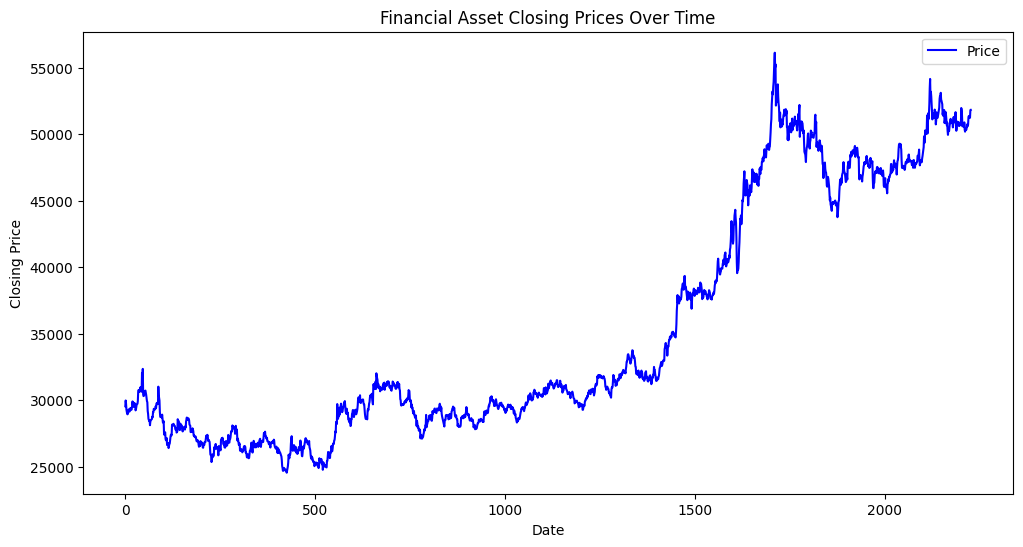

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with financial asset data, and 'Close' column contains the closing prices

# Plot the time series of the financial asset's closing prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Price', color='blue')
plt.title('Financial Asset Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
df


,Date,Price,Open,High,Low,Volume,Chg%,MA_50,MA_200,Trend,Daily_Return
0,2014-01-01,29542,29435,29598,29340,2930,0.25,NaN,NaN,Sideways,NaN
1,2014-01-02,29975,29678,30050,29678,3140,1.47,NaN,NaN,Sideways,0.014657
2,2014-01-03,29727,30031,30125,29539,3050,-0.83,NaN,NaN,Sideways,-0.008274
3,2014-01-04,29279,29279,29279,29279,0,-1.51,NaN,NaN,Sideways,-0.015070
4,2014-01-06,29119,29300,29395,29051,24380,-0.55,NaN,NaN,Sideways,-0.005465
...,...,...,...,...,...,...,...,...,...,...,...
2222,2022-08-01,51260,51899,51899,51023,1350,-0.20,50836.34,49895.750,Uptrend,-0.002044
2223,2022-08-02,51274,51438,51527,51100,230,0.03,50838.90,49913.780,Uptrend,0.000273
2224,2022-08-03,51225,51250,51375,51137,70,-0.10,50847.10,49929.755,Uptrend,-0.000956
2225,2022-08-04,51802,51713,51903,51713,10,1.13,50865.98,49950.365,Uptrend,0.011264


# Seasonal Analysis: Analyze seasonal patterns in the financial asset's price movements.

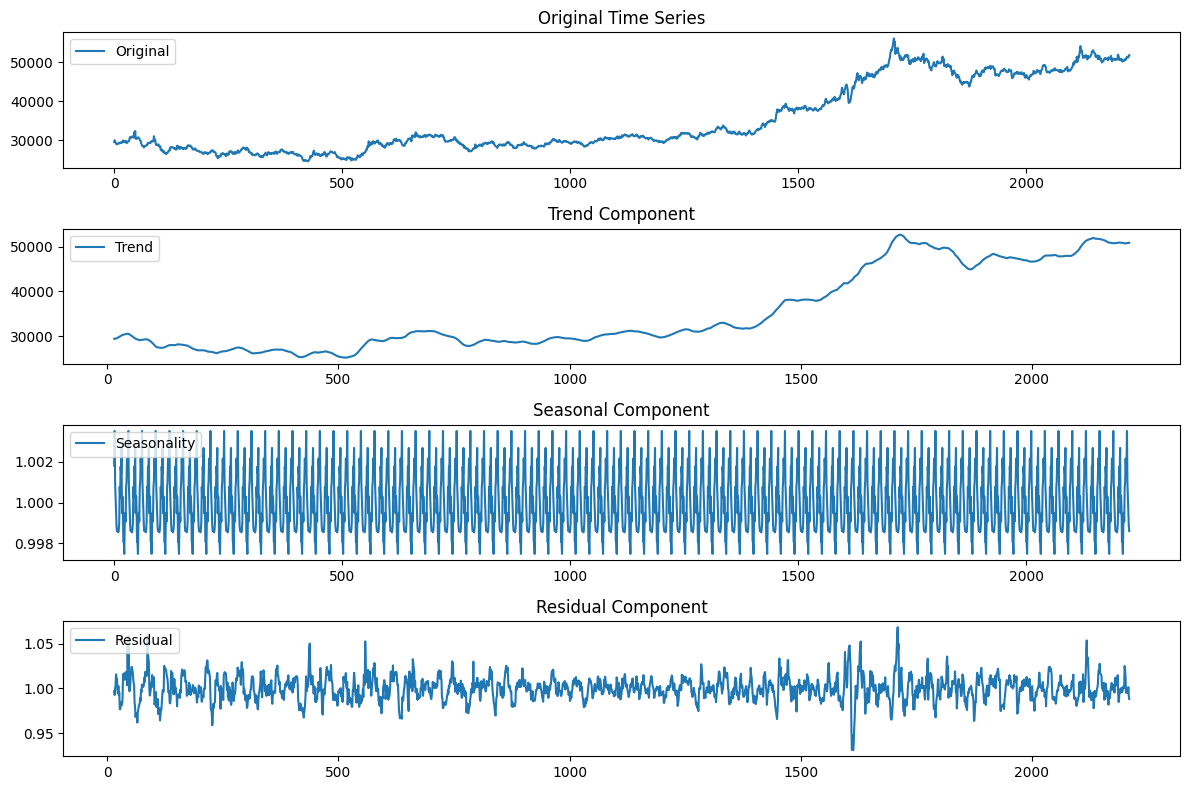

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#The seasonal_decompose function from statsmodels.tsa.seasonal is used to decompose a time series into its underlying components:
#trend, seasonality, and residual (or error)., is helpful in understanding the underlying patterns and characteristics of a time series,
#which can aid in time series forecasting and analysis
# Performing seasonal decomposition
decomposition = seasonal_decompose(df['Price'], model='multiplicative', period=30)  # Set the seasonal period as 30 for monthly data.
#The seasonal_decompose function takes the time series data (df['Price']) as input and decomposes it into its components.
#The model parameter specifies decomposition model, period as 30, assuming monthly data- 30 data points (months).

# Extracting the components: trend, seasonality, and residual - extracts the trend component from the decomposition result.
#The trend component represents the underlying long-term trend or direction of the time series, abstracting from short-term fluctuations.
trend = decomposition.trend

#The seasonal component represents the periodic fluctuations or patterns that repeat over a fixed period
seasonal = decomposition.seasonal
#residual component (also known as the noise component)
#The residual component represents the random fluctuations or noise that cannot be explained by the trend and seasonal components.
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Price'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()
#The resulting plot shows the original time series (prices) along with the individual components: trend, seasonality, and residual.
#This decomposition helps in understanding underlying patterns and variations in time series data, making it easier to analyze and model time series.

In [ ]:

# Generate synthetic market index daily returns
np.random.seed(42)
num_days = len(df)
market_index_returns = np.random.normal(0.001, 0.02, num_days)

In [ ]:
# Convert returns to prices
market_index_prices = np.cumprod(1 + market_index_returns) * df['Price'].iloc[0]

In [ ]:
# Create DataFrame for the market index
market_index_df = pd.DataFrame({'Date': df.index,'Market_Index': market_index_prices})
market_index_df.set_index('Date', inplace=True)

In [ ]:
# Calculate daily returns for both the financial asset and the market index
df['Asset_Daily_Return'] = df['Price'].pct_change()
market_index_df['Market_Index_Daily_Return'] = market_index_df['Market_Index'].pct_change()


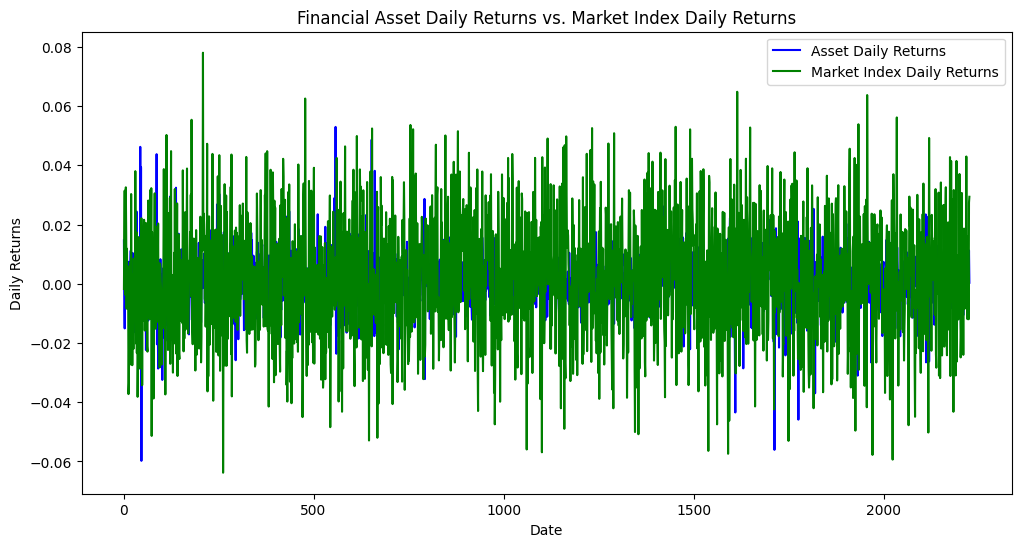

In [ ]:
# Plot the financial asset's daily returns and the market index's daily returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Asset_Daily_Return'], label='Asset Daily Returns', color='blue')
plt.plot(market_index_df.index, market_index_df['Market_Index_Daily_Return'], label='Market Index Daily Returns', color='green')
plt.legend()
plt.title('Financial Asset Daily Returns vs. Market Index Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()


In [ ]:
# Sample data setup (Replace this with your actual data)
data = {'Date': pd.date_range(start='2023-01-01', periods=100),'Close': np.random.randint(1000, 1200, 100),}

In [ ]:
# Assuming 'df' is the DataFrame with financial asset data
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)


In [ ]:
# Assuming 'market_index_df' is the DataFrame with market index data
market_index_data = {'Date': pd.date_range(start='2023-01-01', periods=100),'Close': np.random.randint(2000, 2200, 100),}
market_index_df = pd.DataFrame(market_index_data)
market_index_df.set_index('Date', inplace=True)


In [ ]:
# Calculate daily returns for the financial asset
df['Asset_Daily_Return'] = df['Close'].pct_change()

In [ ]:
# Calculate daily returns for the market index
market_index_df['Market_Index_Daily_Return'] = market_index_df['Close'].pct_change()


In [ ]:
# Calculate cumulative returns for the financial asset and the market index
df['Asset_Cumulative_Return'] = (1 + df['Asset_Daily_Return']).cumprod() - 1
market_index_df['Market_Index_Cumulative_Return'] = (1 + market_index_df['Market_Index_Daily_Return']).cumprod() - 1


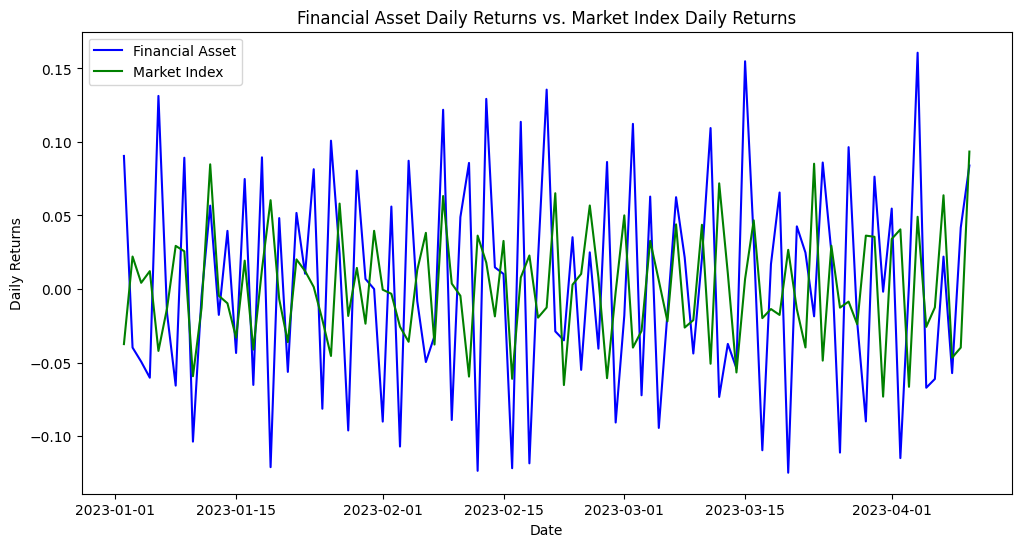

In [ ]:
# Plotting daily returns of the financial asset and the market index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Asset_Daily_Return'], label='Financial Asset', color='blue')
plt.plot(market_index_df.index, market_index_df['Market_Index_Daily_Return'], label='Market Index', color='green')
plt.legend()
plt.title('Financial Asset Daily Returns vs. Market Index Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()


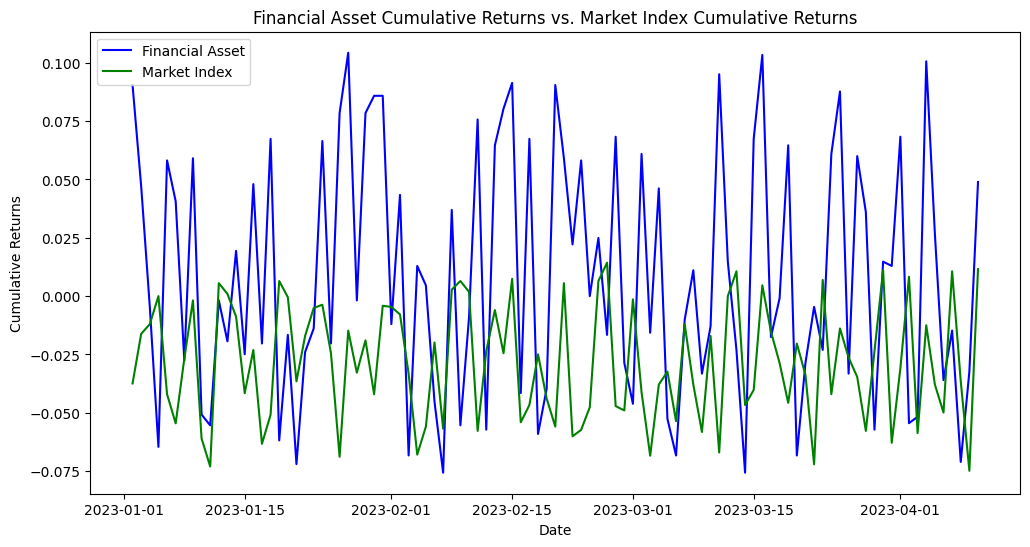

In [ ]:
 # Plotting cumulative returns of the financial asset and the market index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Asset_Cumulative_Return'], label='Financial Asset', color='blue')
plt.plot(market_index_df.index, market_index_df['Market_Index_Cumulative_Return'], label='Market Index', color='green')
plt.legend()
plt.title('Financial Asset Cumulative Returns vs. Market Index Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

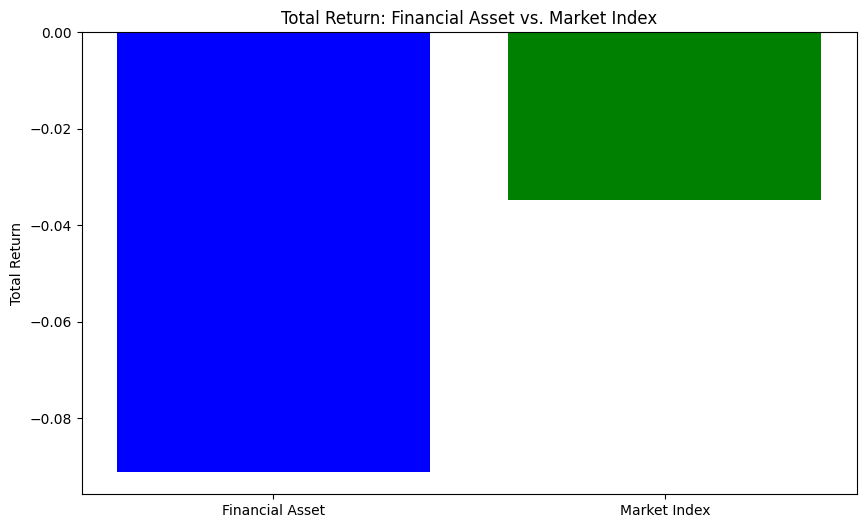

In [ ]:
# Calculate total return for the financial asset and the market index
asset_total_return = df['Close'][-1] / df['Close'][0] - 1
market_index_total_return = market_index_df['Close'][-1] / market_index_df['Close'][0] - 1

# Plotting total return of the financial asset and the market index
plt.figure(figsize=(10, 6))
plt.bar(['Financial Asset', 'Market Index'], [asset_total_return, market_index_total_return], color=['blue', 'green'])
plt.title('Total Return: Financial Asset vs. Market Index')
plt.ylabel('Total Return')
plt.show()

# Seasonal Analysis(Differencing) and Forecasting

ADF Statistic: 0.21426864211695315
p-value: 0.9730506190416429


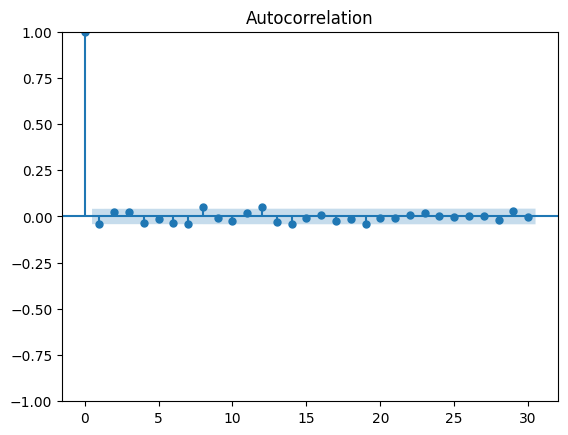

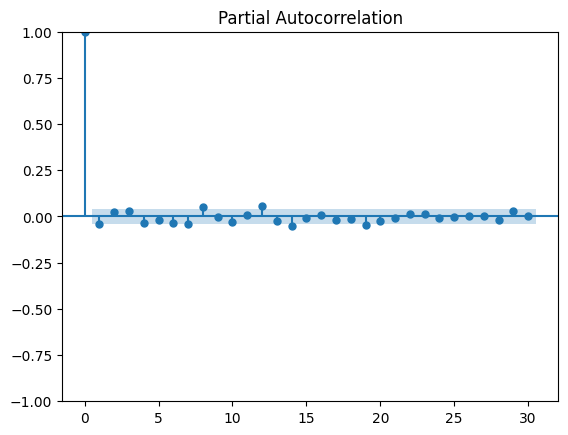

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 2227
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -15859.741
Date:                            Mon, 14 Aug 2023   AIC                          31729.482
Time:                                    09:07:55   BIC                          31757.963
Sample:                                         0   HQIC                         31739.889
                                           - 2227                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9025      0.059     15.328      0.000       0.787       1.018
ma.L1         -0.9195      0.054   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-73-b8a67a5f40f0>:44: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')


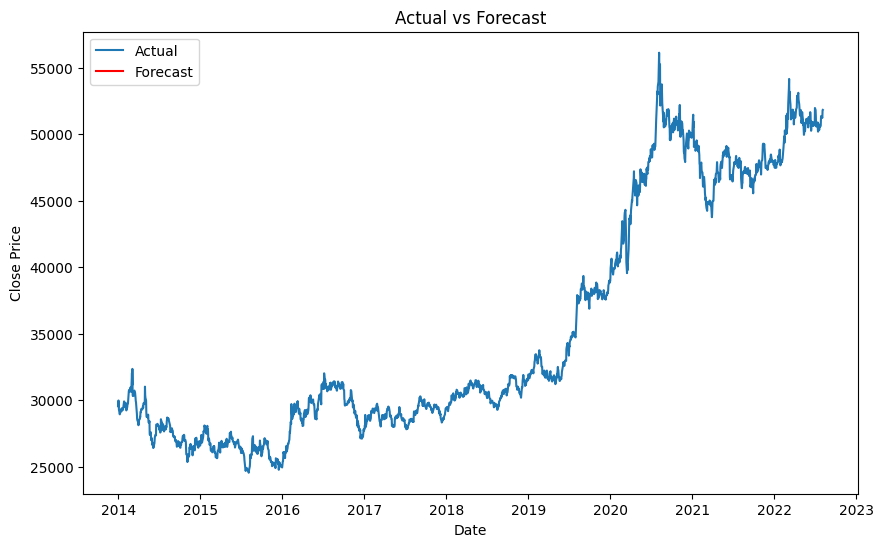

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv('/content/Gold Price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the 'Price' column for analysis
ts = df['Price']

# Check for stationarity
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Differencing to make the series stationary if necessary
d = 1  # Adjust as needed
ts_diff = ts.diff(d).dropna()

# Plot ACF and PACF to determine order (p, d, q) and seasonal order (P, D, Q, S)
plot_acf(ts_diff, lags=30)
plot_pacf(ts_diff, lags=30)
plt.show()

# Set order and seasonal order based on the plots
order = (1, d, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Print model summary
print(results.summary())

# Forecasting
forecast_steps = 60  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)
forecast_df.index.name = 'Date'

# Plotting the actual data and forecast
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast')
plt.legend()
plt.show()


In [ ]:
# Select the 'Price' column for analysis
ts = df['Price']


In [ ]:
#Seasonal differencing is a common technique used to remove the seasonal component from a time series,
#making it more stationary and suitable for modeling.
# Perform seasonal differencing
seasonal_period = 12 #12 months
# This line sets the value of seasonal_period to 12, which indicates that the dataset has a seasonal pattern with a period of 12 time units
ts_seasonal_diff = ts.diff(seasonal_period).dropna()
# difference between consecutive values in the 'Close' column of the dataset (ts) with a lag of seasonal_period (12 in this case).
#dropna() function is used to remove any rows with missing values that might result from the differencing.

In [ ]:
#The adfuller function is used to perform the Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

# Check for stationarity after seasonal differencing
#This line applies the ADF test to the time series data ts_seasonal_diff ( result of the Sd performed earlier).
#The ADF test calculates various stats & returns a result object containing several test statistics and their associated p-values, as well as other information.
result = adfuller(ts_seasonal_diff)

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -7.018545544607817
p-value: 6.634827836410394e-10


Determine order(p,d,q):

The autoregressive order refers to the number of lag observations included in the model. It represents the number of past time steps (lags) used as predictors for the current value. A high value of p means that the model uses many past observations to predict the current one.

The moving average order specifies the number of lagged forecast errors included in the model. These lagged errors are used as predictors for the current value. A higher value of q means that the model takes into account more past forecast errors to predict the current value.

Seasonal Order (P, D, Q, S):

P (Seasonal Autoregressive Order): Similar to the autoregressive order, the seasonal autoregressive order represents the number of lag observations at a seasonal lag included in the model. It captures the relationship between the observation and its previous observations at the same seasonal lag.
D (Seasonal Integrated Order): The seasonal integrated order represents the number of seasonal differences needed to make the seasonal time series stationary. It is similar to the integrated order (d) but applied to the seasonal component.
Q (Seasonal Moving Average Order): The seasonal moving average order specifies the number of lagged forecast errors at a seasonal lag included in the model. These lagged errors are used to predict the current value at the same seasonal lag.
S (Seasonal Period): The seasonal period indicates the length of the seasonal pattern in the data. For example, in monthly data with a yearly seasonality, the seasonal period would be 12.


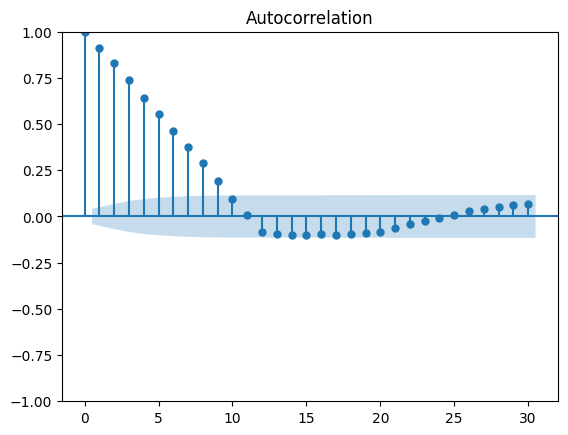

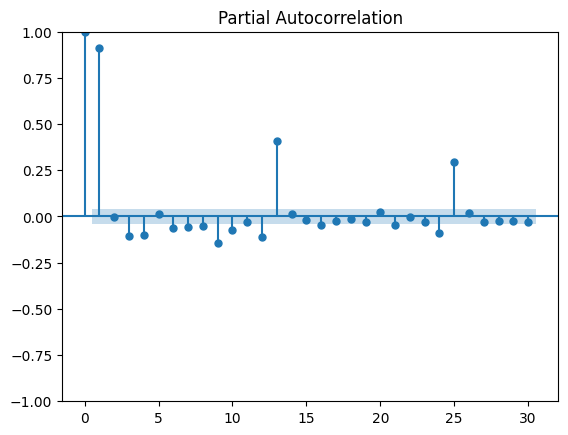

In [ ]:
# These functions are used to plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

# Plot ACF and PACF to determine order (p, d, q) and seasonal order (P, D, Q, S)
#Autocorrelation is a measure of how each observation in the time series is correlated with its past observations at various lags.
plot_acf(ts_seasonal_diff, lags=30)
plot_pacf(ts_seasonal_diff, lags=30)
plt.show()
#By analyzing the ACF and PACF plots, you can identify potential orders for the ARIMA or SARIMA model.
#Peaks in the ACF plot at specific lags may suggest the order of the moving average component,
#while peaks in the PACF plot may suggest the order of the autoregressive component.

Lags refer to the number of past time steps used as predictors for the current value. They are used in autoregressive and moving average components of ARIMA and SARIMA models. The choice of the number of lags influences the complexity of the model and how it captures the patterns in the data.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
# Set order and seasonal order based on ACF and PACF plots
# This line defines the order of the non-seasonal ARIMA component.
#In this example, (1, 1, 1) means that the ARIMA model includes an autoregressive (AR) order of 1, a differencing (I) order of 1,
#and a moving average (MA) order of 1.
order = (1, 1, 1)  # Example order, adjust as needed
#This line defines the seasonal order of the SARIMA component.
#(1, 1, 1, 12) indicates seasonal autoregressive(SAR) order of 1, seasonal differencing (SI) order of 1, seasonal moving average (SMA) order of 1,
#and a seasonal period of 12 (for monthly data with yearly seasonality).
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<

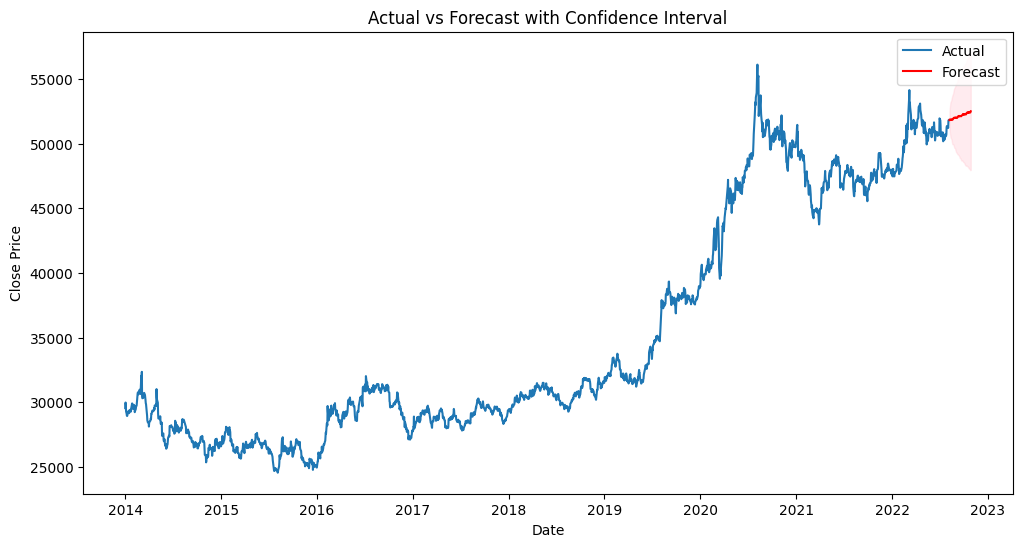

In [ ]:
# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
#The enforce_stationarity and enforce_invertibility parameters are set to False to allow for flexibility in modeling.
#These parameters ensure that the model is well-defined and invertible.
results = model.fit()#This line fits the SARIMA model to the data using the fit method.
#It estimates the model parameters and performs the necessary computations to make forecasts.

# Forecasting
#This line sets the number of time steps for which you want to forecast into the future.
forecast_steps = 60  # Extend the forecast horizon
#This line generates a forecast using the fitted model. It generates the predicted mean values for the specified number of forecast_steps.
forecast = results.get_forecast(steps=forecast_steps)
#This line creates a new time index for the forecast using pd.date_range.
#The forecast_steps + 1 accounts for the current data point and the additional forecasted data points. The frequency 'B' indicates business days.
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')

# Plotting the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
#This line fills the area between the upper and lower confidence interval bounds with a pink color to visualize the uncertainty of the forecast.
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast with Confidence Interval')
plt.legend()

# Project Summary - Time Series Forecasting of Gold Prices using SARIMA

1) Importing Required Libraries:
The project is started by importing necessary libraries such as pandas, numpy, matplotlib.pyplot, and statsmodels.

2) Loading and Preprocessing the Dataset:
The yahoo_stock.csv dataset was loaded into a pandas DataFrame. The 'Date' column was converted to a datetime format and set as the DataFrame index.

3) Exploring the Dataset:
The structure of the dataset was examined to identify column names and data types. Columns like 'Date', 'High', 'Low', 'Open', 'price', 'Volume', and '%chg' were present.

4) Selecting Relevant Data:
For the time series analysis, the 'Price' column containing stock closing prices was selected.

5) Performing Seasonal Differencing:
Seasonal differencing with a period of 12 was applied to the 'Price' prices to remove the annual seasonality.

6) Checking Stationarity:
The Augmented Dickey-Fuller (ADF) test was employed to assess stationarity of the seasonally differenced data. ADF statistic and p-value were used to determine stationarity.

7) ACF and PACF Analysis:
Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots were generated to identify potential orders for the SARIMA model. Patterns and peaks in these plots were analyzed to guide order selection.

8) Building the SARIMA Model:
Non-seasonal order (1, 1, 1) and seasonal order (1, 1, 1, 12) were chosen based on ACF and PACF analysis. A SARIMA model was constructed using the SARIMAX class from the statsmodels library.

9) Generating Forecasts:
Forecasts for the next 60 time steps (days) were produced using the trained SARIMA model. A new time index was created to represent the forecasted period.

10) Visualizing Results:
A plot was generated to showcase the actual 'Prices', the forecasted values, and the associated confidence interval. The plot facilitated the comparison between the forecast and the true values.

11) Conclusion and Further Steps:
The project demonstrated the process of time series forecasting using SARIMA. Further steps might involve model evaluation, parameter tuning, and assessing forecast accuracy using appropriate metrics.

12) Key Takeaways:
The project encompassed data loading, preprocessing, seasonal differencing, and stationarity assessment. ACF and PACF plots were pivotal in determining orders for the SARIMA model. The SARIMA model was constructed, forecasts were generated, and results were visualized. The analysis highlighted the importance of appropriate model selection and parameter tuning for accurate forecasts. Time series forecasting can be intricate, and enhancing the accuracy of forecasts often requires additional steps, domain knowledge, and continuous refinement of the chosen model.

[ ]
